# import

In [2]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from livelossplot import PlotLossesKeras

# Датасет

In [23]:
df = pd.read_csv('UCI_Credit_Card.csv')

df.drop('ID', axis=1, inplace=True)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.drop_duplicates(inplace=True)

z = np.abs(stats.zscore(df)) # частично удаляем выбросы и нормируем выплаты
df = df[(z < 3).all(axis=1)]


print('shape of dataset - ', df.shape)
print()

df.head()

shape of dataset -  (26396, 24)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Сравнение с AutoML

Перед построением моделей воспользуемся AutoML-библиотекой для предварительной оценки часто используемых моделей.

В функции setup задана предварительная предобработка (не всегда хорошая):
* Исправление имбаланса в таргете
* Предобработка
* Нормализация
* Выбор переменных по значимости

Цель использования - предварительно оценить качество моделей для дальнейшего сравнения

In [ ]:
!pip uninstall scikit-learn -y
!pip uninstall numpy -y

!pip install scikit-learn==0.23.2
!pip install numpy==1.20

!pip install pycaret

In [ ]:
import pycaret
from pycaret.classification import *

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
clf = setup(data=df, target='default', session_id=123, fix_imbalance = True, remove_outliers = True, normalize = True, transformation = True, feature_selection = True, use_gpu=True)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29965, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('fix_perfect', Remove_100(target='default')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Advan

In [ ]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8163,0.7572,0.3864,0.5924,0.4674,0.3624,0.3746,2.800
et,Extra Trees Classifier,0.8044,0.7287,0.3907,0.5435,0.4545,0.3393,0.3462,7.210
gbc,Gradient Boosting Classifier,0.8039,0.7567,0.4429,0.5373,0.4853,0.3655,0.3683,15.301
rf,Random Forest Classifier,0.8035,0.7464,0.4128,0.5380,0.4670,0.3492,0.3539,7.861
dummy,Dummy Classifier,0.7913,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.765
ada,Ada Boost Classifier,0.7829,0.7386,0.4785,0.4815,0.4793,0.3423,0.3427,4.149
nb,Naive Bayes,0.7770,0.7361,0.5210,0.4695,0.4937,0.3513,0.3522,0.821
svm,SVM - Linear Kernel,0.7736,0.0000,0.5338,0.4649,0.4957,0.3511,0.3532,1.420
ridge,Ridge Classifier,0.7539,0.0000,0.5908,0.4346,0.5006,0.3424,0.3496,1.145
lda,Linear Discriminant Analysis,0.7539,0.7558,0.5905,0.4345,0.5005,0.3423,0.3494,1.305


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Выводы из таблицы выше:

* Оценка в таблице сортируется по Accuracy, но для оценки качества мы используем AUC

Модели с лучшим AUC:


1.   Light Gradient Boosting Machine	
2.   Gradient Boosting Classifier
3.   Random Forest Classifier
4.   Linear Discriminant Analysis
5.   Logistic Regression

Видно, что среднее качество состовляет 0.75, но также модели 1-3 долго обучаются, что затрудняет тюнинг гиперпараметров


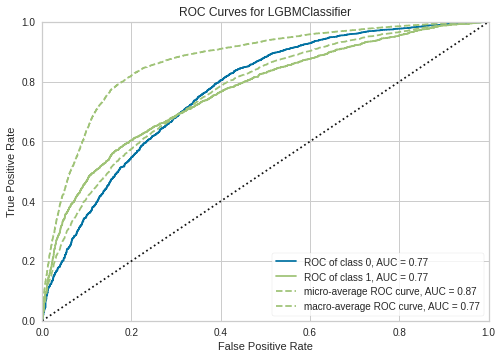

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best_model, plot='auc')

In [ ]:
# автоматический тюнинг не привел к улучшению результата
# упали показатели AUC, recall и precision для выбранных моделей
tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8314,0.6395,0.3101,0.7247,0.4343,0.3535,0.3976
1,0.8149,0.6078,0.2524,0.6442,0.3627,0.2778,0.3198
2,0.8244,0.6209,0.2716,0.7062,0.3924,0.3127,0.3617
3,0.8229,0.6191,0.2692,0.6957,0.3882,0.3076,0.3552
4,0.8284,0.6332,0.2981,0.7126,0.4203,0.3390,0.3835
5,0.8229,0.6226,0.2788,0.6864,0.3966,0.3138,0.3578
6,0.8293,0.6268,0.2795,0.7389,0.4056,0.3288,0.3821
7,0.8243,0.6271,0.2885,0.6897,0.4068,0.3234,0.3660
8,0.8218,0.6158,0.2620,0.6943,0.3805,0.3004,0.3493


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.0005, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0,
               n_estimators=30, n_jobs=-1, num_leaves=2, objective=None,
               random_state=123, reg_alpha=0.2, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


Вывод:
* Средний AUC для лучших модей приблизительно составляет 0.75 - к этому показателю будем стремиться
* Время работы некоторых моделей долгое, увеличение числа гиперпареметров приведет к еще более долгому обучению  

# Модели

Некоторые модели требуют много ресурсов, поэтому обучались с маленьким количеством параметров в GridSearch. В целом, качество можно улучшить на 0.05-0.10 по AUC в сравнении с AutoML.

In [25]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# функция для оценки моделей
def get_report(pipe, pipe_grid=None, grid=False):
  predictions = pipe.predict(x_test)
  predictions = np.round(predictions.ravel(), 0)

  roc_auc_scores_pipe = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])

  print('y_test - ', Counter(y_test))
  print('predictions - ', Counter(predictions))
  print()
  print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
  
  if grid:
    roc_auc_scores_grid = roc_auc_score(y_test, pipe_grid.predict_proba(x_test)[:, 1])
    print(f'grid - pipe: {round(roc_auc_scores_grid - roc_auc_scores_pipe, 5)}')

  print()
  print(classification_report(y_test, predictions))

In [27]:
# делим выборку на обучающую и тестовую в пропорции 75/25
x = df.drop('default', axis=1).values
y = df.default.values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19797, 23), (19797,), (6599, 23), (6599,))

## LogisticRegression

In [34]:
x_ = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default'], axis=1)
x_ = PolynomialFeatures(2).fit_transform(x_)
x_ = np.append(x_, df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].values, axis=1)

x_train_poly, x_test_poly, y_train, y_test = train_test_split(x_, y, stratify=y, test_size=0.25)

In [43]:
scaler = MinMaxScaler()
logreg = LogisticRegression(max_iter=1500, class_weight='balanced')

pipe_logreg = Pipeline(steps=[('scaler', scaler), 
                       ('logistic', logreg)])

pipe_logreg.fit(x_train_poly, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=1500))])

In [44]:
predictions = pipe_logreg.predict(x_test_poly)
predictions = np.round(predictions.ravel(), 0)

roc_auc_scores_pipe = roc_auc_score(y_test, pipe_logreg.predict_proba(x_test_poly)[:, 1])

print('y_test - ', Counter(y_test))
print('predictions - ', Counter(predictions))
print()
print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
print()
print(classification_report(y_test, predictions))

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4694, 1: 1905})

roc_auc_score - 0.7672

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5117
           1       0.47      0.61      0.53      1482

    accuracy                           0.76      6599
   macro avg       0.67      0.71      0.68      6599
weighted avg       0.79      0.76      0.77      6599



In [37]:
param_grid = {
    'logistic__C': [110, 100],
    'logistic__tol': [0.001, 0.005],
    'logistic__solver': ['lbfgs',],
    'logistic__class_weight': ['balanced'],
}

In [38]:
pipe_logreg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'logistic', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [39]:
%%time
search_logreg = GridSearchCV(pipe_logreg, param_grid, cv=7, n_jobs=-1, scoring='roc_auc', refit='roc_auc', verbose=3)
search_logreg.fit(x_train_poly, y_train)

print(search_logreg.best_params_)
print('------------')

Fitting 7 folds for each of 4 candidates, totalling 28 fits
{'logistic__C': 110, 'logistic__class_weight': 'balanced', 'logistic__solver': 'lbfgs', 'logistic__tol': 0.001}
------------
CPU times: total: 22.1 s
Wall time: 1min 44s


C:\Users\danii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
predictions = search_logreg.predict(x_test_poly)
predictions = np.round(predictions.ravel(), 0)

roc_auc_scores_pipe_grid = roc_auc_score(y_test, search_logreg.predict_proba(x_test_poly)[:, 1])

print('y_test - ', Counter(y_test))
print('predictions - ', Counter(predictions))
print()
print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
print(f'roc_auc_score with grid - {round(roc_auc_scores_pipe_grid, 4)}')
print()
print(classification_report(y_test, predictions))

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4636, 1: 1963})

roc_auc_score - 0.7672
roc_auc_score with grid - 0.7657

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5117
           1       0.46      0.61      0.53      1482

    accuracy                           0.75      6599
   macro avg       0.67      0.70      0.68      6599
weighted avg       0.78      0.75      0.76      6599



In [ ]:
# Вывод
# LogisticRegression хорошо распознает класс 0
# модель правильно предсказала 0 в 88% и нашла 80% из всех 0

# для класса 1 - датасет изначально несбалансирован, класса 0 больше, чем 1
# для предсказания дефолта такая модель не подходит

## LinearRegression

In [ ]:
scaler = MinMaxScaler()
linreg = LinearRegression()

pipe_linreg = Pipeline(steps=[('scaler', scaler),
                       ('logistic', linreg)])

pipe_linreg.fit(x_train_poly, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LinearRegression())])

In [ ]:
predictions = pipe_linreg.predict(x_test_poly)
diff = predictions - y_test

print('MSE:', np.mean(diff**2))
print('MAE:', np.mean(abs(diff)))
print('RMSE:', np.sqrt(np.mean(diff**2)))
print()
print(classification_report(y_test, np.round(predictions.ravel(), 0), zero_division=0))

MSE: 0.14252797829877115
MAE: 0.2812347238709905
RMSE: 0.377528778106744

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5117
           1       0.67      0.33      0.44      1482

    accuracy                           0.81      6599
   macro avg       0.75      0.64      0.66      6599
weighted avg       0.79      0.81      0.79      6599



In [ ]:
# Аналогично с LogisticRegression - класс 0 обнаруживает лучше, чем 1

## RandomForestClassifier

In [28]:
scaler = MinMaxScaler()
model_rforest = RandomForestClassifier()

pipe_rforest = Pipeline(steps=[('scaler', scaler),
                                ('model', model_rforest)])

pipe_rforest.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier())])

In [29]:
get_report(pipe=pipe_rforest)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5741, 1: 858})

roc_auc_score - 0.7649

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5117
           1       0.64      0.37      0.47      1482

    accuracy                           0.81      6599
   macro avg       0.74      0.65      0.68      6599
weighted avg       0.79      0.81      0.79      6599



In [30]:
param_grid = {
    'model__n_jobs': [-1],
    'model__n_estimators': [130, 160, 180],
    'model__class_weight': ['balanced'],
    'model__criterion': ['entropy',],
    'model__max_depth': [4, 6, 7],
}

In [31]:
pipe_rforest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

In [32]:
%%time
search_rforest = GridSearchCV(pipe_rforest,
                              param_grid,
                              cv=5,
                              n_jobs=-1,
                              scoring='roc_auc',
                              refit='roc_auc',
                              verbose=3)

search_rforest.fit(x_train, y_train)

print(search_rforest.best_params_)
print('------------')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 7, 'model__n_estimators': 130, 'model__n_jobs': -1}
------------
CPU times: total: 3.31 s
Wall time: 21.3 s


In [33]:
get_report(pipe=pipe_rforest, pipe_grid=search_rforest, grid=True)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5741, 1: 858})

roc_auc_score - 0.7649
grid - pipe: 0.0061

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5117
           1       0.64      0.37      0.47      1482

    accuracy                           0.81      6599
   macro avg       0.74      0.65      0.68      6599
weighted avg       0.79      0.81      0.79      6599



In [ ]:
# модель показывает высокое качество на 0 классе, следует сравнить с CatBoost - тоже основана на деревьях решений

## Naive Bayes

In [ ]:
scaler = MinMaxScaler()
model_nbayes = GaussianNB()

pipe_nbayes = Pipeline(steps=[('scaler',scaler), 
                              ('model', model_nbayes)])

pipe_nbayes.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA()),
                ('model', GaussianNB())])

In [ ]:
get_report(pipe=pipe_nbayes)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4443, 1: 2156})

roc_auc_score - 0.6889

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5117
           1       0.40      0.58      0.47      1482

    accuracy                           0.71      6599
   macro avg       0.63      0.66      0.63      6599
weighted avg       0.75      0.71      0.72      6599



In [ ]:
param_grid = {
    'model__var_smoothing': [1e-9, 1e-10, 1e-11, 1e-8, 1e-7, 1e-3, 1e-5, 5e-5],
}

In [ ]:
%%time
search_nbayes = GridSearchCV(pipe_nbayes,
                             param_grid,
                             cv=10,
                             n_jobs=-1,
                             scoring='roc_auc',
                             refit='roc_auc',
                             verbose=3)
search_nbayes.fit(x_train, y_train)

print(search_nbayes.best_params_)
print('------------')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'model__var_smoothing': 0.001}
------------
CPU times: user 211 ms, sys: 50.1 ms, total: 261 ms
Wall time: 2.42 s


In [ ]:
get_report(pipe=pipe_nbayes, pipe_grid=search_nbayes, grid=True)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4443, 1: 2156})

roc_auc_score - 0.6889
grid - pipe: 0.00569

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5117
           1       0.40      0.58      0.47      1482

    accuracy                           0.71      6599
   macro avg       0.63      0.66      0.63      6599
weighted avg       0.75      0.71      0.72      6599



In [ ]:
# Эта модель взята из-за быстрой скорости обучения.
# также модель различает класс 1 лучше предыдущих моделей

## LGBMClassifier

In [10]:
scaler = MinMaxScaler()
model_lgbm_cls = LGBMClassifier()

pipe_lgbm_cls = Pipeline(steps=[('scaler', scaler), 
                                ('model', model_lgbm_cls)])

pipe_lgbm_cls.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LGBMClassifier())])

In [11]:
get_report(pipe=pipe_lgbm_cls)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5810, 1: 789})

roc_auc_score - 0.7788

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5117
           1       0.66      0.35      0.46      1482

    accuracy                           0.81      6599
   macro avg       0.74      0.65      0.67      6599
weighted avg       0.79      0.81      0.79      6599



In [ ]:
# модель без настройки гиперпараметров показывает высокий показатель AUC, как и в AutoML

In [12]:
pipe_lgbm_cls.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'model__boosting_type', 'model__class_weight', 'model__colsample_bytree', 'model__importance_type', 'model__learning_rate', 'model__max_depth', 'model__min_child_samples', 'model__min_child_weight', 'model__min_split_gain', 'model__n_estimators', 'model__n_jobs', 'model__num_leaves', 'model__objective', 'model__random_state', 'model__reg_alpha', 'model__reg_lambda', 'model__silent', 'model__subsample', 'model__subsample_for_bin', 'model__subsample_freq'])

In [14]:
param_grid = {
    'model__boosting_type': ['gbdt'],
    'model__importance_type': ['split'],
    'model__learning_rate': [0.01],
    'model__n_jobs': [-1],
    'model__n_estimators': [100, 200],
    'model__subsample_for_bin': [200_000, 190_000],
    'model__class_weight': ['balanced']
}

In [15]:
%%time
search_lgbm_cls = GridSearchCV(pipe_lgbm_cls,
                               param_grid,
                               cv=7,
                               n_jobs=-1,
                               scoring='roc_auc',
                               refit='roc_auc',
                               verbose=100)

search_lgbm_cls.fit(x_train, y_train)

print(search_lgbm_cls.best_params_)
print('------------')

Fitting 7 folds for each of 4 candidates, totalling 28 fits
{'model__boosting_type': 'gbdt', 'model__class_weight': 'balanced', 'model__importance_type': 'split', 'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__n_jobs': -1, 'model__subsample_for_bin': 200000}
------------
CPU times: user 3.41 s, sys: 160 ms, total: 3.57 s
Wall time: 32.7 s


In [16]:
get_report(pipe=pipe_lgbm_cls, pipe_grid=search_lgbm_cls, grid=True)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5810, 1: 789})

roc_auc_score - 0.7788
grid - pipe: 0.00482

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5117
           1       0.66      0.35      0.46      1482

    accuracy                           0.81      6599
   macro avg       0.74      0.65      0.67      6599
weighted avg       0.79      0.81      0.79      6599



In [ ]:
# Эта модель уже лучше различает классы 1 и 0, но скорость обучения долгая
# также показывает высокую точность

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
scaler = MinMaxScaler()
model_xgb_cls = XGBClassifier()

pipe_xgb_cls = Pipeline(steps=[('scaler', scaler), 
                               ('model', model_xgb_cls)])

pipe_xgb_cls.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=20)),
                ('model', XGBClassifier())])

In [ ]:
get_report(pipe=pipe_xgb_cls)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5856, 1: 743})

roc_auc_score - 0.7668

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5117
           1       0.64      0.32      0.42      1482

    accuracy                           0.81      6599
   macro avg       0.73      0.63      0.65      6599
weighted avg       0.78      0.81      0.78      6599



In [ ]:
pipe_xgb_cls.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'pca', 'model', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'model__base_score', 'model__booster', 'model__colsample_bylevel', 'model__colsample_bynode', 'model__colsample_bytree', 'model__gamma', 'model__learning_rate', 'model__max_delta_step', 'model__max_depth', 'model__min_child_weight', 'model__missing', 'model__n_estimators', 'model__n_jobs', 'model__nthread', 'model__objective', 'model__random_state', 'model__reg_alpha', 'model__reg_lambda', 'model__scale_pos_weight', 'model__seed', 'model__silent', 'model__subsample', 'model__verbosity'])

In [ ]:
param_grid = {
    'model__objective': ['binary:logistic'],
    'model__max_depth': [5, 10],
    'model__learning_rate': [0.1, 0.01, 0.05],
}

In [ ]:
%%time
search_lgbm_cls = GridSearchCV(pipe_xgb_cls,
                               param_grid,
                               cv=10,
                               n_jobs=-1,
                               scoring='roc_auc',
                               refit='roc_auc',
                               verbose=100)
search_lgbm_cls.fit(x_train, y_train)

print(search_lgbm_cls.best_params_)
print('------------')

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__objective': 'binary:logistic'}
------------
CPU times: user 8.84 s, sys: 575 ms, total: 9.41 s
Wall time: 8min 1s


In [ ]:
get_report(pipe=pipe_xgb_cls, pipe_grid=search_lgbm_cls, grid=True)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5856, 1: 743})

roc_auc_score - 0.7668
grid - pipe: 0.00166

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5117
           1       0.64      0.32      0.42      1482

    accuracy                           0.81      6599
   macro avg       0.73      0.63      0.65      6599
weighted avg       0.78      0.81      0.78      6599



In [ ]:
# Модель показывет схожую с LGBMClassifier точность, но работает дольше

## CatBoost

In [ ]:
!pip install catboost shap ipywidgets

In [ ]:
def get_report_catboost(pipe, pipe_grid=None, grid=False):
  predictions = pipe.predict(x_val)
  predictions = np.round(predictions.ravel(), 0)

  roc_auc_scores_pipe = roc_auc_score(y_val, pipe.predict_proba(x_val)[:, 1])

  print('y_test - ', Counter(y_val))
  print('predictions - ', Counter(predictions))
  print()
  print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
  
  if grid:
    roc_auc_scores_grid = roc_auc_score(y_test, pipe_grid.predict_proba(x_test)[:, 1])
    print(f'grid - pipe: {round(roc_auc_scores_grid - roc_auc_scores_pipe, 5)}')

  print()
  print(classification_report(y_val, predictions))

In [ ]:
from catboost import CatBoostClassifier, cv, Pool, MetricVisualizer
from catboost.utils import select_threshold, get_roc_curve, get_fpr_curve, get_fnr_curve
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x = df.drop('default', axis=1)
y = df.default

poly = PolynomialFeatures(3)
xx = poly.fit_transform(x)
print(xx.shape)

x_train, x_val, y_train, y_val = train_test_split(xx, y, stratify=y, test_size=0.25)

(x_train.shape, y_train.shape), (x_val.shape, y_val.shape)

(26396, 2600)


(((19797, 2600), (19797,)), ((6599, 2600), (6599,)))

In [ ]:
pool = Pool(data=xx, label=y)
eval_pool = Pool(x_val, y_val)

In [ ]:
model_catboost_cls = CatBoostClassifier(
    loss_function='Logloss', custom_loss='AUC', #eval_metric='AUC',
    learning_rate=0.01, iterations=1500,
#     l2_leaf_reg=6, random_strength=10, bagging_temperature=3, # параметры улучшают качество, 
                                                                # но требовательны к мощности компьютера
)

m = model_catboost_cls.fit(x_train, y_train, eval_set=(x_val, y_val),
                       verbose=200, plot=True, early_stopping_rounds=300)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6877056	test: 0.6877067	best: 0.6877067 (0)	total: 279ms	remaining: 6m 58s
500:	learn: 0.4212451	test: 0.4279813	best: 0.4279813 (500)	total: 1m 59s	remaining: 3m 59s
1000:	learn: 0.4053403	test: 0.4265972	best: 0.4265882 (982)	total: 3m 58s	remaining: 1m 59s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.4265785823
bestIteration = 1010

Shrink model to first 1011 iterations.


In [ ]:
get_report_catboost(pipe=model_catboost_cls)

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5821, 1: 778})

roc_auc_score - 0.7902

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5117
           1       0.68      0.36      0.47      1482

    accuracy                           0.82      6599
   macro avg       0.76      0.66      0.68      6599
weighted avg       0.80      0.82      0.80      6599



In [ ]:
model_catboost_cls.get_feature_importance(prettified=True).head(10)

,Feature Id,Importances
0,6,3.034314
1,1460,2.867061
2,111,1.526385
3,1553,1.078467
4,664,0.951030
5,135,0.838621
6,895,0.782829
7,1554,0.749420
8,1062,0.685230
9,1271,0.645882


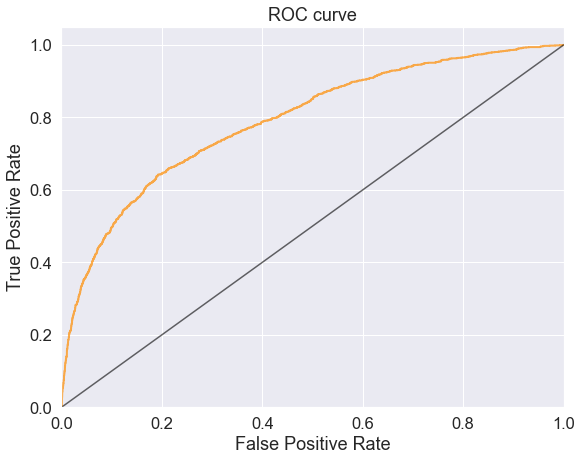

In [ ]:
curve = get_roc_curve(model_catboost_cls, eval_pool)
(FPR, TPR, threshholds) = curve
roc_auc = sklearn.metrics.auc(FPR, TPR)

sns.set(font_scale=1.5)
sns.set_color_codes('muted')
plt.figure(figsize=(9, 7))

plt.plot(FPR, TPR, lw=2, label='ROC curve', color='darkorange', alpha=0.7)
plt.plot([0, 1], [0, 1], color='black', alpha=0.6)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

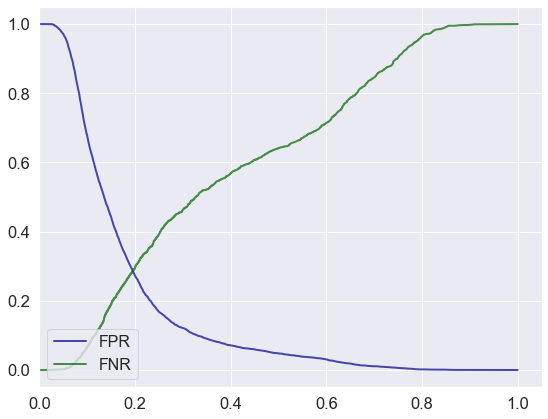

In [ ]:
curve = get_roc_curve(model_catboost_cls, eval_pool)
(threshholds, FPR) = get_fpr_curve(curve=curve)
(threshholds, FNR) = get_fnr_curve(curve=curve)

plt.figure(figsize=(9, 7))

plt.plot(threshholds, FPR, color='darkblue', lw=2, label='FPR', alpha=.7)
plt.plot(threshholds, FNR, color='darkgreen', lw=2, label='FNR', alpha=.7)
plt.xlim([0., 1.])
plt.xlim([0., 1.05])
plt.grid(True)
plt.legend(loc='lower left', fontsize=16)
plt.show()

In [ ]:
print(select_threshold(model=model_catboost_cls, data=eval_pool, FNR=0.01))
print(select_threshold(model=model_catboost_cls, data=eval_pool, FPR=0.01))

0.06543946125416464
0.7108808178272374


In [ ]:
max_fpr = select_threshold(model=model_catboost_cls, data=eval_pool, FPR=0.01)  

roc_auc_fpr = roc_auc_score(y_val, model_catboost_cls.predict_proba(x_val)[:, 1], max_fpr=max_fpr)
roc_auc = roc_auc_score(y_val, model_catboost_cls.predict_proba(x_val)[:, 1])

print('roc_auc_score without FPR ', roc_auc)
print('roc_auc_score with FPR    ', roc_auc_fpr)
print()
print(classification_report(y_val, np.round(model_catboost_cls.predict(x_val), 0)))

roc_auc_score without FPR  0.790160645747801
roc_auc_score with FPR     0.7784179429870823

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5117
           1       0.68      0.36      0.47      1482

    accuracy                           0.82      6599
   macro avg       0.76      0.66      0.68      6599
weighted avg       0.80      0.82      0.80      6599



In [ ]:
# Модель показывает наилушее соотношение время обучения/ качество. Кроме того, есть потенциал увеличения AUC до 0.85 и больше (максимальный AUC был 0.82).
# также есть возможность сбалансировать классы для метрики (округление происходит не на границе 0.5, а сдвигается до, например, 0.71)
# Такой сдвиг позволяет модели правильнее распознавать классы

# NN

Нейронная сеть тоже требует много ресурсов и времени, но удалось получить похожий результат по recall и precision

In [ ]:
x = df.drop('default', axis=1).values
y = df.default.values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19797, 23), (19797,), (6599, 23), (6599,))

In [ ]:
sc = MinMaxScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [ ]:
model = Sequential()

model.add(Dense(units = 300, input_shape = (x_train_sc.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

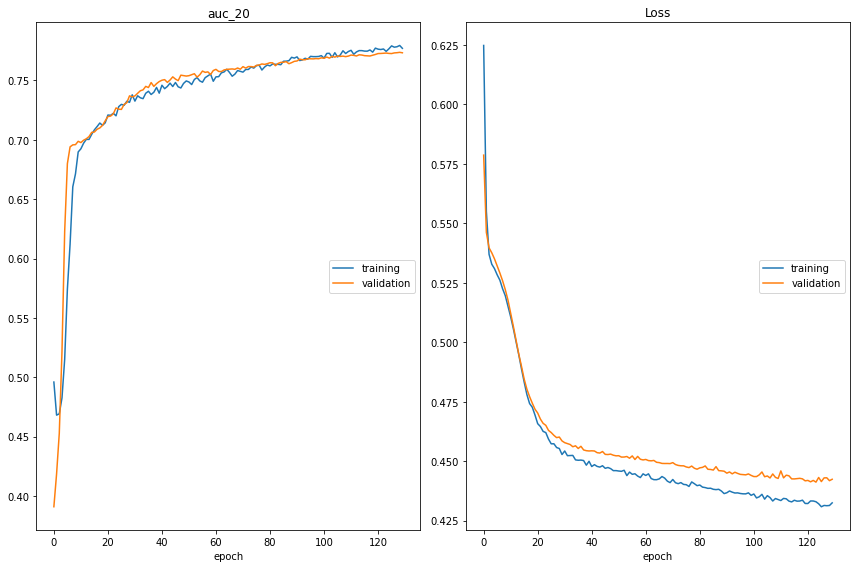

auc_20
	training         	 (min:    0.468, max:    0.779, cur:    0.777)
	validation       	 (min:    0.391, max:    0.774, cur:    0.773)
Loss
	training         	 (min:    0.431, max:    0.625, cur:    0.432)
	validation       	 (min:    0.441, max:    0.579, cur:    0.442)
116/116 [==============================] - 1s 9ms/step - loss: 0.4325 - auc_20: 0.7770 - val_loss: 0.4424 - val_auc_20: 0.7733

CPU times: user 4min 13s, sys: 23.6 s, total: 4min 37s
Wall time: 4min 7s


In [ ]:
%%time
cp = ModelCheckpoint('model/', save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0008, nesterov=True), metrics=[keras.metrics.AUC()])
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=[keras.metrics.AUC()])

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=[keras.metrics.AUC()])
history = model.fit(x_train_sc, y_train, 
                    validation_split = 0.25, batch_size=128, epochs=130, verbose=1,
                    callbacks = [cp, PlotLossesKeras(), callback])
                                 

print('\n ==============')

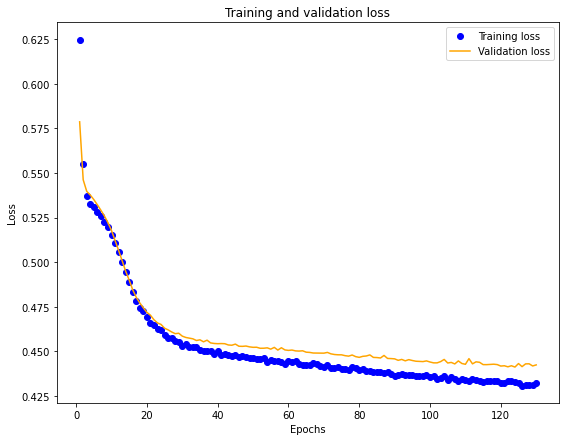

In [ ]:
plt.figure(figsize=(9, 7))
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

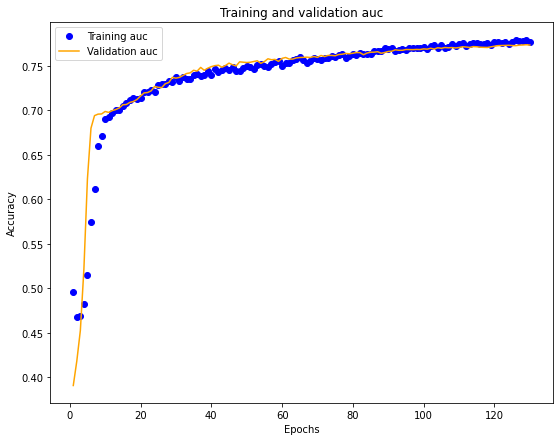


Best auc score: 0.773665189743042


In [ ]:
plt.figure(figsize=(9, 7))
acc = history.history[list(history.history.keys())[1]]
val_acc = history.history[list(history.history.keys())[3]]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training auc')
plt.plot(epochs, val_acc, 'orange', label='Validation auc')
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print()
print(f'Best auc score: {np.max(val_acc)}')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/')

predictions = model.predict(x_test_sc)
predictions = np.round(predictions.ravel(), 0)

print('y_test - ', Counter(y_test))
print('preds - ', Counter(predictions))
print()
print()

print(classification_report(y_test, predictions))

207/207 [==============================] - 0s 2ms/step
y_test -  Counter({0: 5117, 1: 1482})
preds -  Counter({0.0: 5778, 1.0: 821})


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5117
           1       0.66      0.36      0.47      1482

    accuracy                           0.81      6599
   macro avg       0.75      0.65      0.68      6599
weighted avg       0.80      0.81      0.79      6599



In [ ]:
!pip install keras_tuner

In [ ]:
import keras_tuner

In [ ]:
def build_model(hp):

  model = Sequential()

  model.add(Dense(
      units=hp.Int("units", min_value=100, max_value=500, step=100), input_shape = (x_train_sc.shape[1],), activation='relu')
  )
  
  model.add(Dense(
      units=hp.Int("units", min_value=100, max_value=300, step=50), activation='relu')
  )
  model.add(Dropout(rate = hp.Choice('rate', values=[0.1, 0.2, 0.4]) ))

  model.add(Dense(
      units=hp.Int("units", min_value=100, max_value=300, step=50), activation='relu')
  )
  model.add(Dense(
      units=hp.Int("units", min_value=100, max_value=300, step=50), activation='relu')
  )

  model.add(Dropout(rate = hp.Choice('rate', values=[0.1, 0.2, 0.4]) ))

  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  

  opt = keras.optimizers.SGD(learning_rate =  hp.Choice('learning_rate', values=[0.0008, 0.005, 0.007])  , nesterov=True)

  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[keras.metrics.AUC()])

  return model

In [ ]:
tuner = keras_tuner.RandomSearch(build_model, objective='val_loss', max_trials=5, seed=1881)

In [ ]:
%%time
callback2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

tuner.search(x_train_sc, y_train, epochs=5, validation_split=0.2, callbacks=[callback2])

Trial 5 Complete [00h 00m 23s]
val_loss: 0.469102680683136

Best val_loss So Far: 0.469102680683136
Total elapsed time: 00h 01m 44s
CPU times: user 1min 33s, sys: 6.03 s, total: 1min 39s
Wall time: 1min 44s


In [ ]:
best_model = tuner.get_best_models()[0]
build_model(keras_tuner.HyperParameters())

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               9600      
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                2

In [ ]:
predictions = best_model.predict(x_test_sc)
predictions = np.round(predictions.ravel(), 0)

print('y_test - ', Counter(y_test))
print('preds - ', Counter(predictions))
print()
print()

print(classification_report(y_test, predictions))

207/207 [==============================] - 1s 3ms/step
y_test -  Counter({0: 5117, 1: 1482})
preds -  Counter({0.0: 5942, 1.0: 657})


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5117
           1       0.63      0.28      0.39      1482

    accuracy                           0.80      6599
   macro avg       0.73      0.62      0.63      6599
weighted avg       0.78      0.80      0.77      6599



In [ ]:
# качество распознавания 0 класса схожее с моделями выше, но класс 1 распознается хуже

# Результаты

In [ ]:
# Расшифровка:

# y_test -  Counter({0: 5117, 1: 1482})    - показывает сколько 0 и 1 в y_test
# predictions -  Counter({0: 4705, 1: 1894})     - показывает сколько 0 и 1 в распознала выбранная модель

# roc_auc_score - 0.7692    - AUC для выбранной модели без GridSearch
# grid - pipe: -0.00354    - разница между AUC и AUC после GridSearch
# Classification_report

In [ ]:
get_report(pipe=pipe_logreg, pipe_grid=search_logreg, grid=True) # LogisticRegression

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4705, 1: 1894})

roc_auc_score - 0.7692
grid - pipe: -0.00354

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5117
           1       0.47      0.60      0.53      1482

    accuracy                           0.76      6599
   macro avg       0.67      0.70      0.68      6599
weighted avg       0.78      0.76      0.77      6599



In [21]:
get_report(pipe=pipe_rforest, pipe_grid=search_rforest, grid=True) # RandomForestClassifier

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5757, 1: 842})

roc_auc_score - 0.7699
grid - pipe: 0.01089

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5117
           1       0.68      0.39      0.49      1482

    accuracy                           0.82      6599
   macro avg       0.76      0.67      0.69      6599
weighted avg       0.81      0.82      0.80      6599



In [ ]:
get_report(pipe=pipe_nbayes, pipe_grid=search_nbayes, grid=True) # Naive Bayes

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 4443, 1: 2156})

roc_auc_score - 0.6889
grid - pipe: 0.00569

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5117
           1       0.40      0.58      0.47      1482

    accuracy                           0.71      6599
   macro avg       0.63      0.66      0.63      6599
weighted avg       0.75      0.71      0.72      6599



In [ ]:
get_report(pipe=pipe_xgb_cls, pipe_grid=search_lgbm_cls, grid=True) # XGBClassifier

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5856, 1: 743})

roc_auc_score - 0.7668
grid - pipe: 0.00166

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5117
           1       0.64      0.32      0.42      1482

    accuracy                           0.81      6599
   macro avg       0.73      0.63      0.65      6599
weighted avg       0.78      0.81      0.78      6599



In [17]:
get_report(pipe=pipe_lgbm_cls, pipe_grid=search_lgbm_cls, grid=True) # LGBMClassifier

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5810, 1: 789})

roc_auc_score - 0.7788
grid - pipe: 0.00482

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5117
           1       0.66      0.35      0.46      1482

    accuracy                           0.81      6599
   macro avg       0.74      0.65      0.67      6599
weighted avg       0.79      0.81      0.79      6599



In [ ]:
get_report_catboost(pipe=model_catboost_cls) # CatBoost

y_test -  Counter({0: 5117, 1: 1482})
predictions -  Counter({0: 5821, 1: 778})

roc_auc_score - 0.7902

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5117
           1       0.68      0.36      0.47      1482

    accuracy                           0.82      6599
   macro avg       0.76      0.66      0.68      6599
weighted avg       0.80      0.82      0.80      6599



In [ ]:
from sklearn.metrics import confusion_matrix # NN

cm = confusion_matrix(y_test, predictions)
TPR = cm[0][0]/(cm[0][0]+cm[0][1])
FPR = cm[1][0]/(cm[1][0]+cm[1][1])

predictions = best_model.predict(x_test_sc)
predictions = np.round(predictions.ravel(), 0)

print('y_test - ', Counter(y_test))
print('preds - ', Counter(predictions))
print()
print('roc-auc:', FPR/TPR)
print()

print(classification_report(y_test, predictions))

207/207 [==============================] - 0s 2ms/step
y_test -  Counter({0: 5117, 1: 1482})
preds -  Counter({0.0: 5942, 1.0: 657})

roc-auc: 0.7557132080694833

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5117
           1       0.63      0.28      0.39      1482

    accuracy                           0.80      6599
   macro avg       0.73      0.62      0.63      6599
weighted avg       0.78      0.80      0.77      6599



**Вывод**:

После сравнения можно выделить следующие модели:
* LogisticRegression - быстрая скорость обучения, что позволило применить PolynomialFeatures - качество выросло с 0.75 до 0.77

* LGBMClassifier - быстрее, чем XGBClassifier. Со стандартными параметрами показывает хорошоее качество распознавания классов

* CatBoost - лучше, чем бустинги LGBMClassifier и XGBClassifier. 

При у обучении CatBoost и NN можно вывести графики loss и AUC. В проведенных экспериментах loss останавливался в диапазоне 0.44-0.45 и не уменьшался дальше. При таком показателе потерь как раз получается качество 0.75-0-76.

Для Catboost удалось преодолеть показатель loss=0.44, тогда и получилось качество 0.82. Но обучается в разы дольше.

**Итог**: 
Лучшие модели для этого датасета CatBoost и NN
